In [1]:
path = "/content/drive/MyDrive/School/ECSE 415/Assignments/Assignment_3/"

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import cv2

#1. Image Classification with Convolutional Neural Network

In [2]:
# Code taken from tutorial and adapted for this assignment

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                         shuffle=False, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

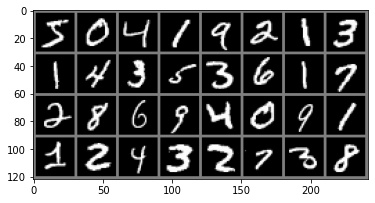

    5     0     4     1     9     2     1     3


In [3]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next() 

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [4]:
import torch.nn as nn
from torch.nn import ReLU
from torch.nn import Flatten
from torch.nn import Linear
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.relu1 = ReLU()
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.relu2 = ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.relu3 = ReLU()
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.relu4 = ReLU()
        self.flat = Flatten()
        self.fc1 = Linear(4096, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.flat(x)
        x = self.fc1(x)

        return x


net = Net()
net = net.to("cuda")

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [6]:
# 38 min with 12 epochs
for epoch in range(12):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        if torch.cuda.is_available():
            device = torch.device("cuda")
            inputs = inputs.to(device)
            labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.299
[1,   400] loss: 2.292
[1,   600] loss: 2.283
[1,   800] loss: 2.268
[1,  1000] loss: 2.241
[1,  1200] loss: 2.182
[1,  1400] loss: 2.008
[1,  1600] loss: 1.482
[1,  1800] loss: 0.800
[2,   200] loss: 0.541
[2,   400] loss: 0.503
[2,   600] loss: 0.493
[2,   800] loss: 0.437
[2,  1000] loss: 0.452
[2,  1200] loss: 0.411
[2,  1400] loss: 0.407
[2,  1600] loss: 0.409
[2,  1800] loss: 0.364
[3,   200] loss: 0.354
[3,   400] loss: 0.384
[3,   600] loss: 0.396
[3,   800] loss: 0.361
[3,  1000] loss: 0.384
[3,  1200] loss: 0.351
[3,  1400] loss: 0.352
[3,  1600] loss: 0.361
[3,  1800] loss: 0.320
[4,   200] loss: 0.312
[4,   400] loss: 0.345
[4,   600] loss: 0.351
[4,   800] loss: 0.319
[4,  1000] loss: 0.343
[4,  1200] loss: 0.314
[4,  1400] loss: 0.314
[4,  1600] loss: 0.325
[4,  1800] loss: 0.285
[5,   200] loss: 0.277
[5,   400] loss: 0.311
[5,   600] loss: 0.310
[5,   800] loss: 0.281
[5,  1000] loss: 0.304
[5,  1200] loss: 0.277
[5,  1400] loss: 0.277
[5,  1600] 

In [7]:
# saving our model
PATH2 = path + './cifar_net.pth'
torch.save(net.state_dict(), PATH2)

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if torch.cuda.is_available():       #moving the tensors to the GPU
            device = torch.device("cuda")
            images = images.to(device)
            labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)   # predict outputs
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 97 %


In [9]:
# Taken from the tutorial, breakdown by label might not be necessary
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if torch.cuda.is_available():
            device = torch.device("cuda")
            images = images.to(device)
            labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 98 %
Accuracy of     2 : 95 %
Accuracy of     3 : 97 %
Accuracy of     4 : 97 %
Accuracy of     5 : 97 %
Accuracy of     6 : 96 %
Accuracy of     7 : 95 %
Accuracy of     8 : 97 %
Accuracy of     9 : 94 %


#2. Segmentation


(750, 500, 3)


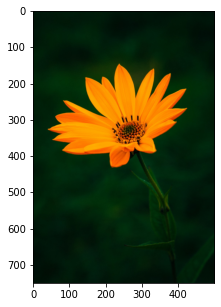

In [10]:
# Loading the image
image_path = path + "images/flower.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap="gray")

In [11]:
# K-Means function
import random
def kMeans(k, imag): 
    fig = plt.figure(figsize=(25, 5))
    if(imag.ndim == 2): # if else to handle color and grayscale images
        channels = 1
    else:
        channels = imag.shape[2]

    centers = np.zeros([k, channels])   # create an array of centers
    imgClustered = np.zeros([imag.shape[0], imag.shape[1]]) # create an array the size of the input image for the clustered image
    for i in range(k):
        for j in range(channels):
            centers[i, j] = random.randint(0, 255) # random coordinate values for the centers
        

    counter = 0
    while (True):
        # print(centers)
        for i in range(imag.shape[0]):
            for j in range(imag.shape[1]):
                closestDist = 9999
                for n in range(k):
                    dist = np.linalg.norm(imag[i, j] - centers[n])  # compute the distance from each point to all centers 
                    if (dist < closestDist):                        # and assign it to the closest point
                        closestDist = dist
                        imgClustered[i, j] = n
        
        oldCenters = np.copy(centers)
        centersCompute = np.zeros([k, channels])
        centersCount = np.zeros([k])
        for i in range(img.shape[0]):       # compute the new centers. Add up all the points in each center
            for j in range(img.shape[1]):   # then divide by the number of points
                a = imgClustered[i, j]
                centersCompute[int(a), :] += imag[i, j]
                centersCount[int(a)] += 1
        for i in range(k):
            for j in range(channels):
                centers[i, j] = centersCompute[i, j]/centersCount[i]
            if(centersCount[i] == 0):
                for w in range(channels):                   # if no points are assigned to center, don't divide by zero and instead create a new center at random
                    centers[i, w] = random.randint(0, 255)  # Regenerate random x value
                

        change = 0

        for i in range(k):
            change2 = np.linalg.norm(centers[i] - oldCenters[i]) # check for convergence of centers
            if np.isnan(change2):
                print(change2)
            else:
                change += change2

        if(counter < 5):
            newImage = np.zeros(img.shape, dtype='uint8')
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    if (channels > 1):
                        for p in range(channels):
                            newImage[i, j, p] = int(centers[int(imgClustered[i, j]), p])
                    else:
                        newImage[i, j] = int(centers[int(imgClustered[i, j])])
            
            fig.add_subplot(1, 5, counter+1)
            plt.title("Iteration " + str(counter+1)), plt.xticks([]), plt.yticks([])
            plt.imshow(newImage, cmap="gray") # display the first 5 iterations

        counter += 1
        
        if(counter >= 10):  # if 10 rounds have been executed, then stop
            break
    plt.show()
    return centers, imgClustered
    print("done")

K-Means with K = 2

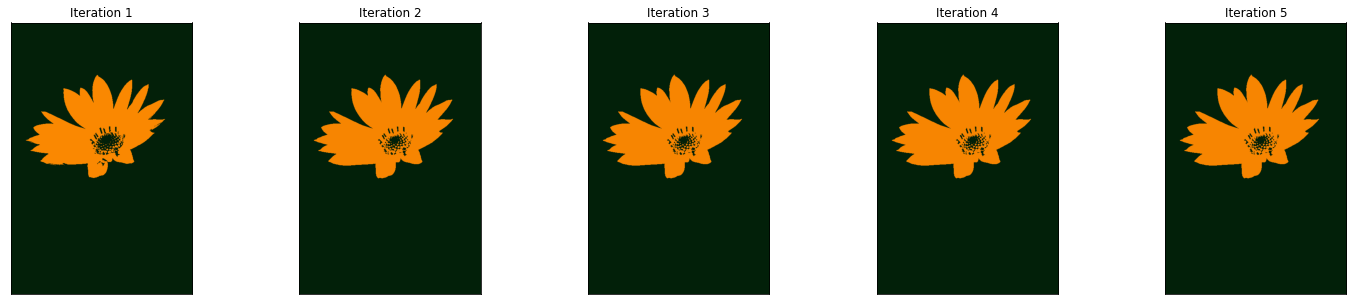

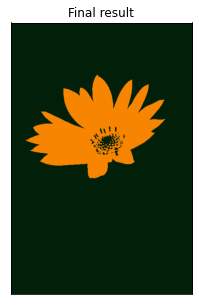

In [12]:
centre, imageClustered = kMeans(2, img)
newImage = np.zeros(img.shape, dtype='uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for p in range(3):
            newImage[i, j, p] = int(centre[int(imageClustered[i, j]), p])

plt.figure(figsize=(5, 5)), plt.title("Final result"), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap="gray")

K-Means with K = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


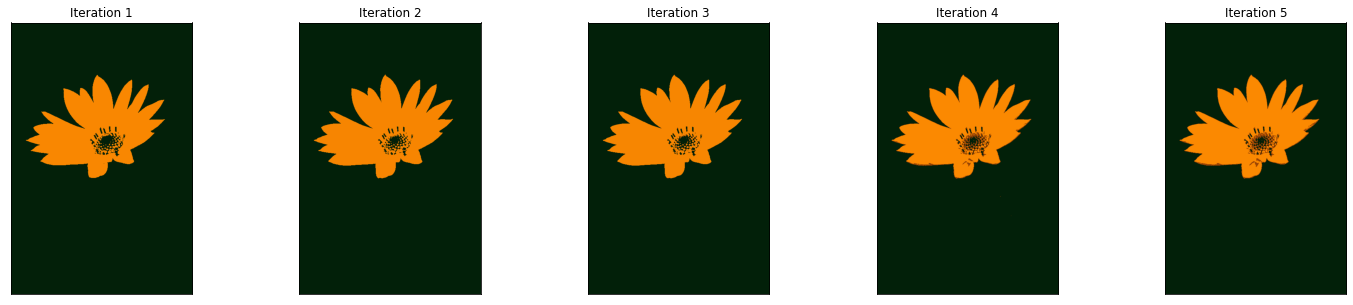

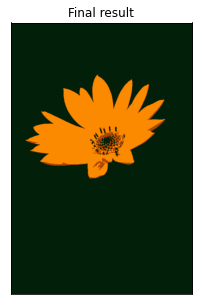

In [13]:
centre, imageClustered = kMeans(3, img)
newImage = np.zeros(img.shape, dtype='uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for p in range(3):
            newImage[i, j, p] = int(centre[int(imageClustered[i, j]), p])

plt.figure(figsize=(5, 5)), plt.title("Final result"), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap="gray")

K-means, grayscale, K = 2

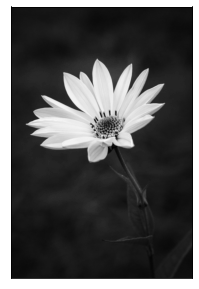

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(5, 5)), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


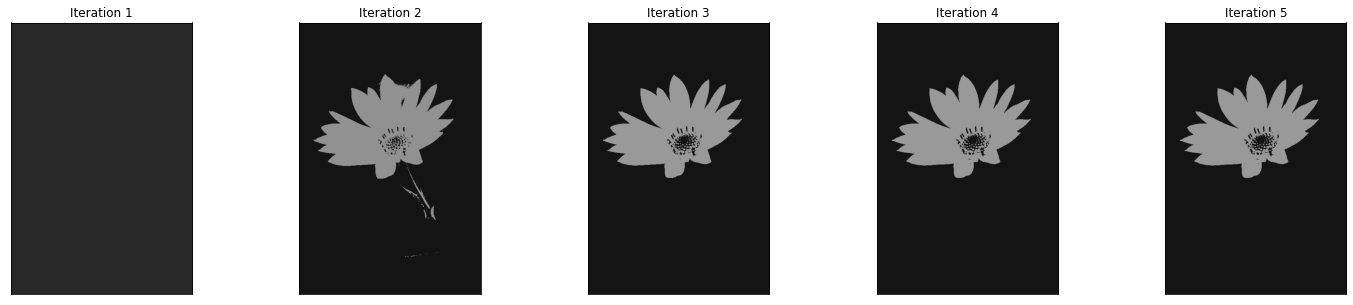

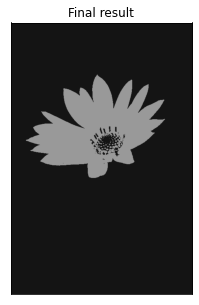

In [15]:
centre, imageClustered = kMeans(2, gray)
newImage = np.zeros(img.shape, dtype='uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImage[i, j] = int(centre[int(imageClustered[i, j])])

plt.figure(figsize=(5, 5)), plt.title("Final result"), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap="gray")

K-means, grayscale, K = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


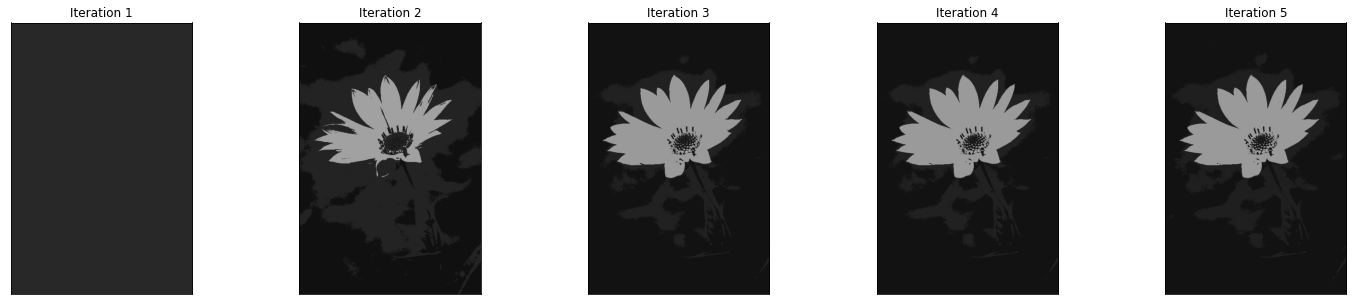

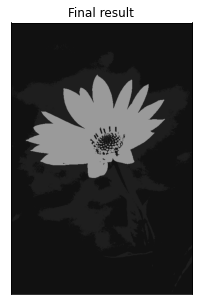

In [16]:
centre, imageClustered = kMeans(3, gray)
newImage = np.zeros(img.shape, dtype='uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImage[i, j] = int(centre[int(imageClustered[i, j])])

plt.figure(figsize=(5, 5)), plt.title("Final result"), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap="gray")

The shadows of the flower are better segmented in grayscale. The flower as a whole is better segmented using color.

##2.2 Normalized Graph-cut and Mean-shift Segmentation


###Graph-Cut

In [17]:
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from sklearn import mixture

In [18]:
image_path = path + "images/flower.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

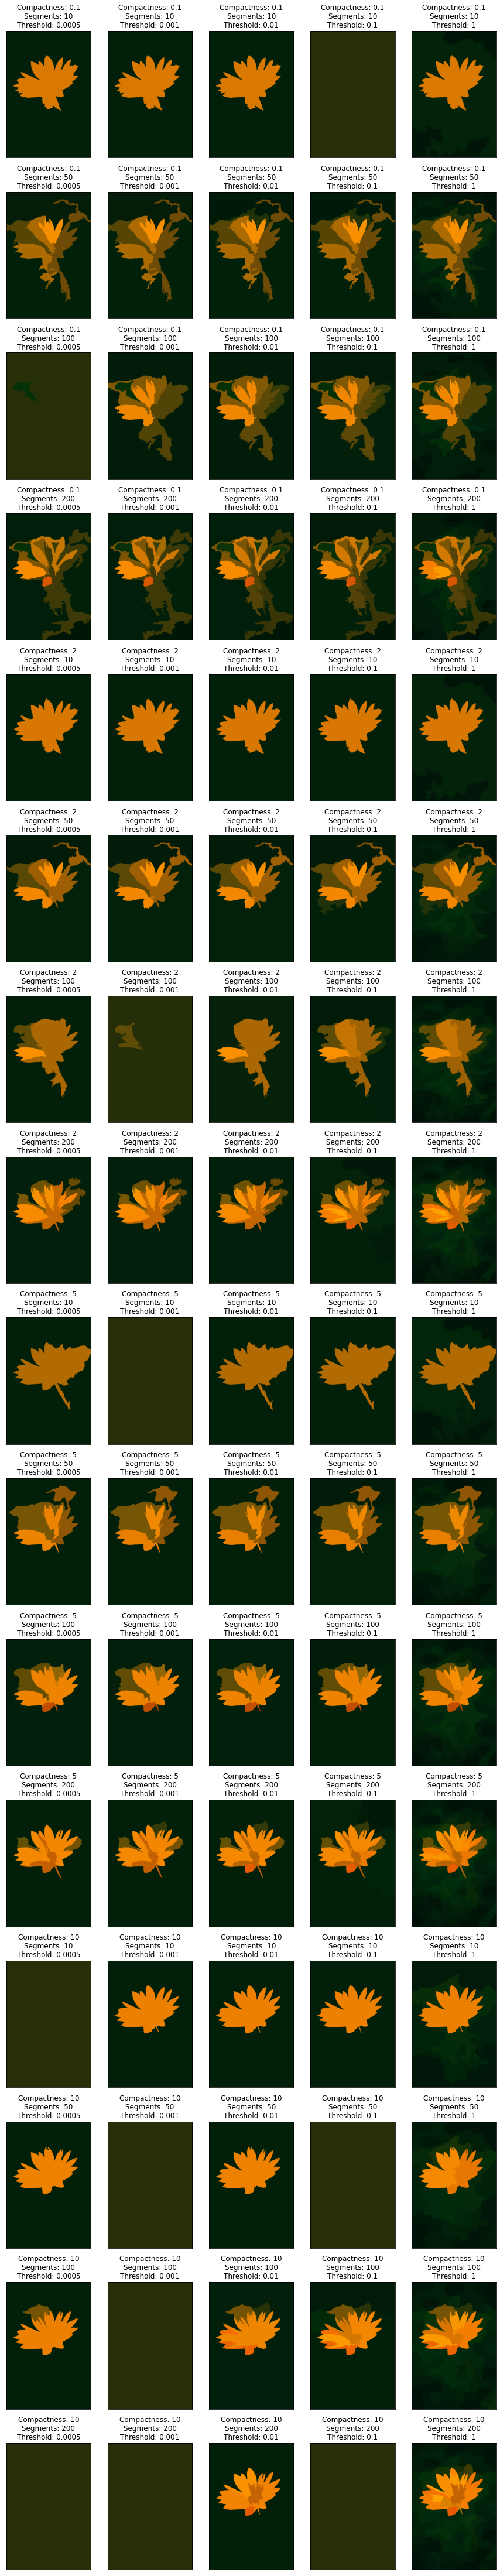

In [19]:
# Adapted code from tutorial

from numpy.ma.core import ceil

compactness = [0.1, 2, 5, 10]
n_segments = [10, 50, 100, 200]
thresh = [0.0005, 0.001, 0.01, 0.1, 1]

fig = plt.figure(figsize=(15,80))
length = len(compactness) * len(n_segments) * len(thresh)
hh = 0

for compct in compactness:  # execute multiple times with various parameters
    for sgmts in n_segments:
        for thrsh in thresh:
            hh += 1
            # apply k-means. This will generate super pixels
            labels1 = segmentation.slic(img, compactness=compct, n_segments=sgmts, start_label=0)
            out1 = color.label2rgb(labels1, img, kind='avg', bg_label=-1)
            out1 = out1.astype('uint8')
            
            # build region adjacency graph
            g = graph.rag_mean_color(img, labels1, mode='similarity')
            
            # apply graph cut
            labels2 = graph.cut_normalized(labels1, g, thresh=thrsh)
            out2 = color.label2rgb(labels2, img, kind='avg', bg_label=-1)
            out2 = out2.astype('uint8')

            fig.add_subplot(ceil(length/5), 5, hh)
            plt.imshow(out2)
            title = "Compactness: " + str(compct) + "\nSegments: " + str(sgmts) + "\nThreshold: " + str(thrsh)
            plt.title(title), plt.xticks([]), plt.yticks([])

plt.show()           

When increasing compactness, slight color variations are not taken into account as much. We can observe that there are a smaller number of different colors with a higher value of compactness. A higher value also values spatial proximity more than color proximity.
The number of segments changes the total number of "zones" that can be segmented. A high number of segments means we might have a large number of colors that represent different zones. The threshold allows for similar colors to coexist. A higher threshold allows more similar colors to be segmented into two groups instead of 1. 

###Mean-Shift

In [20]:
image_path = path + "images/flower.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

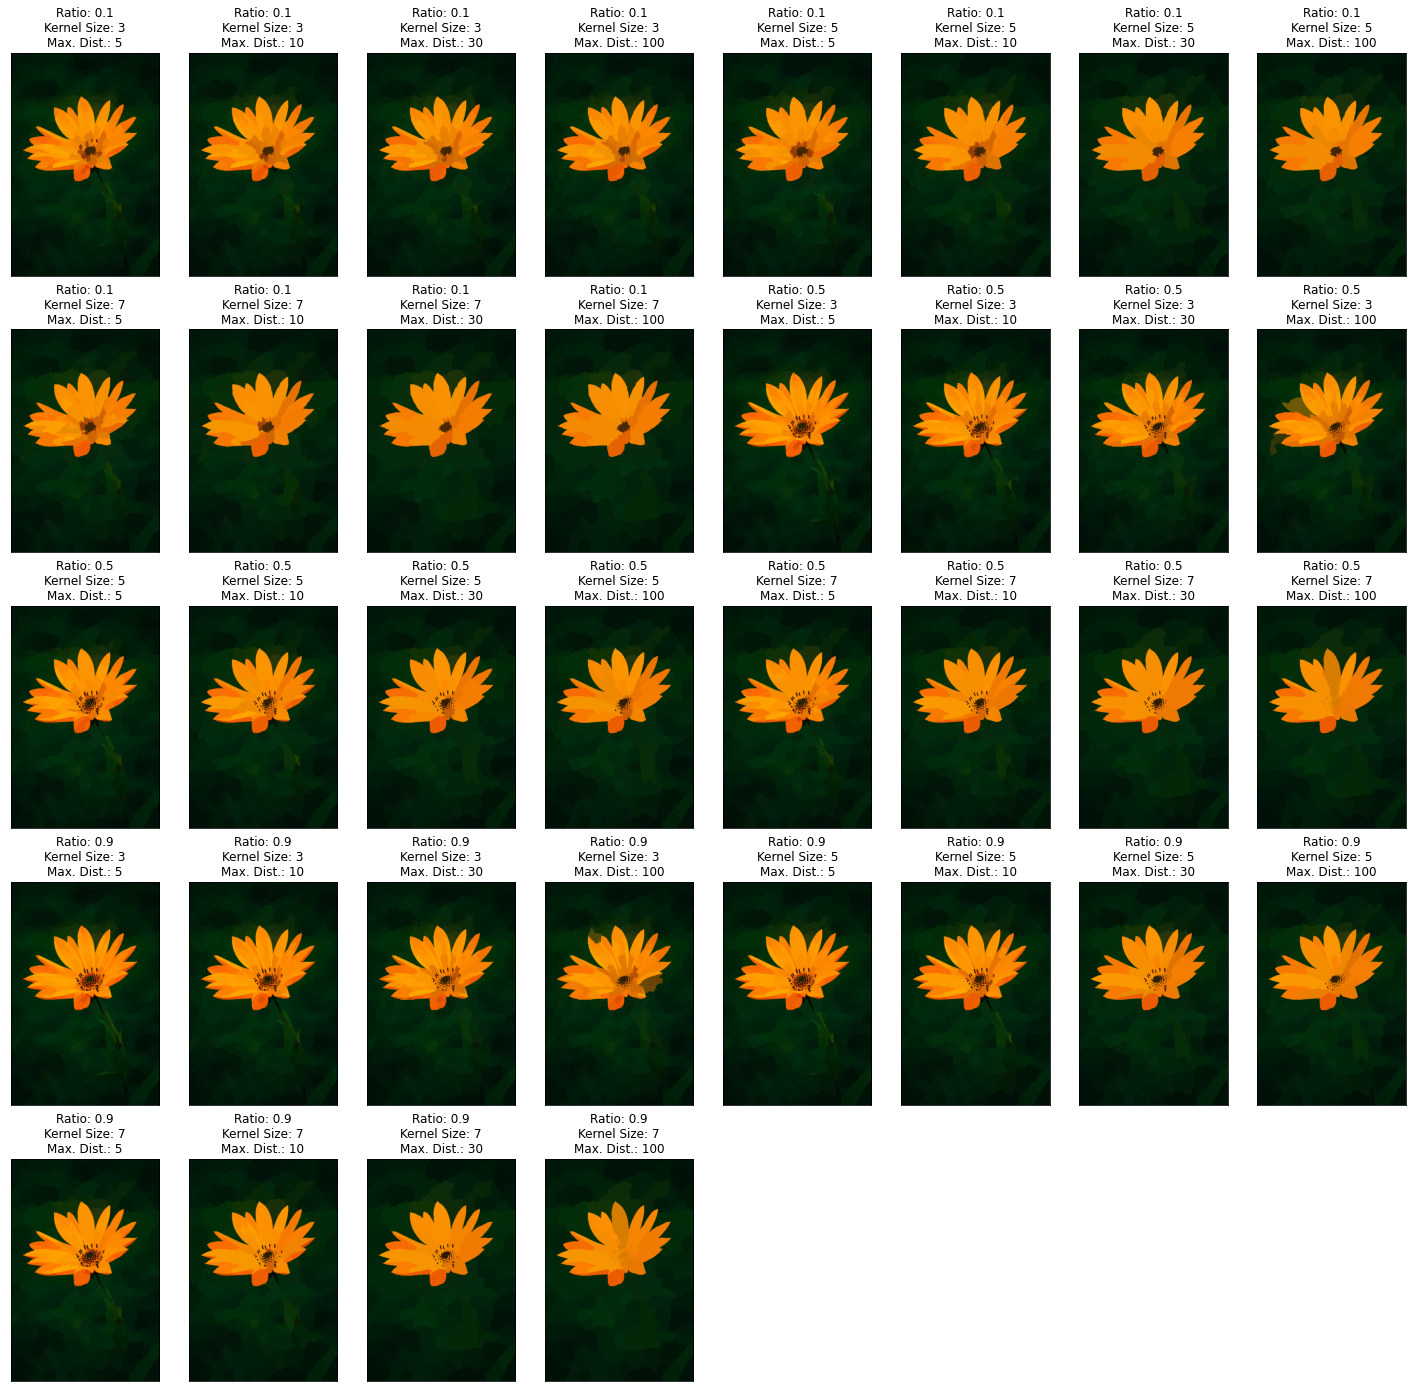

In [21]:
# again, adapted from tutorial

ratio = [0.1, 0.5, 0.9]
kernel_size = [3, 5, 7]
max_dist = [5, 10, 30, 100]

fig = plt.figure(figsize=(25,50))
length = len(compactness) * len(n_segments) * len(thresh)
hh = 0

for rt in ratio:
    for krnlsz in kernel_size:
        for dst in max_dist:
            hh += 1
            # apply meanshift
            label = quickshift(img, ratio=rt, kernel_size=krnlsz, max_dist=dst)
            out = color.label2rgb(label, img, kind='avg', bg_label=-1)
            out = out.astype('uint8')

            # display
            fig.add_subplot(ceil(length/8), 8, hh)
            plt.imshow(out)
            title = "Ratio: " + str(rt) + "\nKernel Size: " + str(krnlsz) + "\nMax. Dist.: " + str(dst)
            plt.title(title), plt.xticks([]), plt.yticks([])
 
plt.show()           

The ratio balances spatial proximity and color proximity so a higher value gives more importance to color proximity, hence more details in the center of the flower with a higher ratio. The kernel is used for smoothing so it makes sense that we observe that the larger the kernel size, the smaller the number of clusters since we are smoothing. The higher the Maximum Distance, the lower the number of clusters, because we want a higher distance between two similar clusters.

#3. Disparity Estimation in Stereo Vision


In [22]:
image_path = path + "images/aloeL.jpg"
imgL = cv2.imread(image_path)
imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)

image_path = path + "images/aloeR.jpg"
imgR = cv2.imread(image_path)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)

In [23]:
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

In [24]:
#1 - Extracting 5x5 windows centered around each pixel location
refWindows = np.zeros([imgL.shape[0], imgL.shape[1], 5, 5, 3])
for i in range(2, imgL.shape[0]-2):
    for j in range(2, imgL.shape[1]-2):
        refWindows[i, j, :, :, :] = imgL[i-2:i+3, j-2:j+3]

In [25]:
#2a - Creating search regions, extracting 5x5 windows, 48 for each location above
cmpWindows = np.zeros([imgR.shape[0], imgR.shape[1], 48, 5, 5, 3])
for i in range(2, imgR.shape[0]-2):
    for j in range(2, imgR.shape[1]-2):
        for k in range(48):
            if(j-2-k < 0):
                break
            cmpWindows[i, j, k, :, :, :] = imgR[i-2:i+3, j-2-k:j+3-k]


In [26]:
#2c - Computing SSD for all windows and their search locations, saving the optimal one
savedSSD = 0
disparity = np.zeros([imgL.shape[0], imgL.shape[1]])
for i in range(2, imgL.shape[0]-2):
    for j in range(2, imgL.shape[1]-2):
        storedDiff = 99999999999
        for k in range(48):
            if(j-2-k < 0):
                break
            diff = np.sum((refWindows[i, j, :, :, :]-cmpWindows[i, j, k, :, :, :])**2)
            # print(diff)
            if(diff < storedDiff):
                # print(diff)
                storedDiff = diff
                disparity[i, j] = k
            if((i==200) and (j == 200)):
                savedSSD = diff



In [27]:
#2b
disparity[:, 0:20] = 0

In [28]:
#2d
print("SSD at pixel (200, 200): \t" + str(int(savedSSD)))
print("Disparity at pixel (200, 200): \t" + str(int(disparity[200, 200])))

SSD at pixel (200, 200): 	20839
Disparity at pixel (200, 200): 	27


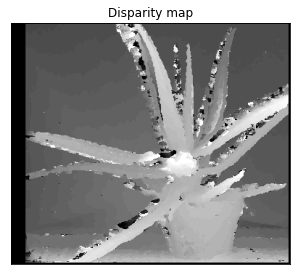

In [29]:
plt.figure(figsize=(5, 5)), plt.xticks([]), plt.yticks([])
plt.title("Disparity map")
plt.imshow(disparity, cmap="gray")